# A1.1 Linear Regression with SGD

* A1.1: *Added preliminary grading script in last cells of notebook.*

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [287]:
def train(X, T, learning_rate, n_epochs, verbose=False):

    # Calculate means and standard deviations of each column in X and T
    Xmeans = np.array([np.mean(X)])
    Xstds = np.array([np.std(X)])
    
    Tmeans = np.array([np.mean(T)])
    Tstds = np.array([np.std(T)])
    
    # Use the means and standard deviations to standardize X and T
    X = (X - Xmeans) / Xstds
    T = (T - Tmeans) / Tstds

    # Insert the column of constant 1's as a new initial column in X
    X = np.insert(X, 0, 1, axis=1)
    
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    w = np.zeros((X.shape[1],1))

    for epoch in range(n_epochs):
        sqerror_sum = 0
        n_samples = X.shape[0]
        for n in range(n_samples):

            # Use current weight values to predict output for sample n, then
            # calculate the error, and
            # update the weight values.
            predicted = X[n:n+1, :] @ w
            error = T[n:n + 1, :] - predicted
            w += learning_rate * X[n:n + 1, :].T * error
            
            # Add the squared error to sqerror_sum
            sqerror_sum += error ** 2
            
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            rmse = np.sqrt(sqerror_sum / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

In [294]:
def use(X, model): # multiple rows of X?
    # Standardize X using Xmeans and Xstds in model
    Xs = (X - model['Xmeans']) / model['Xstds']
    Xs = np.insert(Xs, 0, 1, axis=1)
    
    n_samples = Xs.shape[0]
    
    predicted = np.zeros([Xs.shape[0], 1])
    
    for n in range(n_samples):
        # Predict output values using weights in model
#         print("{}:".format(n), "Xs:", Xs[n:n + 1, :], "w:", model['w'])
        predicted[n] = Xs[n:n + 1, :] @ model['w']
        # Unstandardize the predicted output values using Tmeans and Tstds in model
        predicted[n] = predicted[n] * model['Tstds'] + model['Tmeans']
        # Return the unstandardized output values
#         predicted_array
    return predicted

In [295]:
def rmse(Y, T):
    error = T - Y
    sqerror = error ** 2
    mean = np.mean(sqerror)
    rmse = np.sqrt(mean)
    return rmse

Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

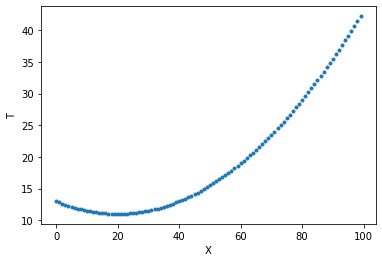

In [296]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [297]:
model = train(X, T, 0.01, 50, verbose=True)
model

Epoch 5 RMSE 0.40
Epoch 10 RMSE 0.40
Epoch 15 RMSE 0.40
Epoch 20 RMSE 0.40
Epoch 25 RMSE 0.40
Epoch 30 RMSE 0.40
Epoch 35 RMSE 0.40
Epoch 40 RMSE 0.40
Epoch 45 RMSE 0.40
Epoch 50 RMSE 0.40


{'w': array([[-0.00576098],
        [ 1.05433338]]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'Tmeans': array([19.5175]),
 'Tstds': array([9.29491938])}

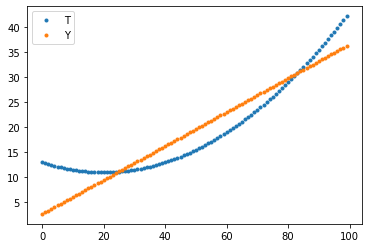

In [298]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

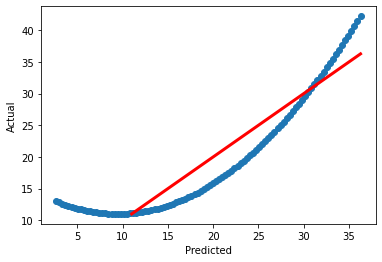

In [299]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [300]:
df = pandas.read_csv('A1_data.csv', delim_whitespace=True, na_values='***')
df

,Year,Mo,Dy,tave,tmax,mxtm,tmin,mntm,vp,rhmax,...,st15mx,st15mxtm,st15mn,st15mntm,volts,year,gust,gusttm,gusdir,etr_asce
0,2019,1,1,-13.535,-10.073,14:10,-16.997,23:50,0.153,0.830,...,-1.803,00:00,-3.195,23:00,NaN,2019.0,5.155,08:10,NaN,0.324
1,2019,1,2,-5.791,6.010,14:50,-17.591,04:00,0.209,0.839,...,-2.941,19:00,-4.802,11:00,NaN,2019.0,4.332,11:50,NaN,0.521
2,2019,1,3,1.374,13.444,13:50,-10.696,05:00,0.340,0.836,...,-1.979,22:00,-4.639,10:00,NaN,2019.0,4.096,15:40,NaN,0.729
3,2019,1,4,4.544,15.089,14:40,-6.000,06:00,0.429,0.815,...,-0.963,23:00,-2.768,10:00,NaN,2019.0,4.096,12:30,NaN,0.893
4,2019,1,5,4.465,14.441,12:50,-5.510,06:40,0.399,0.769,...,-0.350,23:00,-1.401,11:00,NaN,2019.0,4.077,12:20,NaN,0.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,12,27,-1.493,2.260,14:40,-5.245,07:30,0.403,0.908,...,0.308,06:00,0.257,14:00,NaN,2019.0,4.469,16:00,NaN,0.473
361,2019,12,28,-2.695,-1.102,01:50,-4.288,07:00,0.363,0.973,...,0.298,20:00,0.264,10:00,NaN,2019.0,10.623,12:20,NaN,0.681
362,2019,12,29,-3.731,1.871,13:30,-9.333,22:40,0.221,0.690,...,0.288,00:00,0.219,23:00,NaN,2019.0,11.486,07:10,NaN,1.039
363,2019,12,30,-5.427,1.293,13:40,-12.147,06:20,0.226,0.833,...,0.200,00:00,-0.150,23:00,NaN,2019.0,4.586,14:30,NaN,0.504


## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [301]:
df.isna().sum()

Year          0
Mo            0
Dy            0
tave          0
tmax          0
mxtm          0
tmin          0
mntm          0
vp            0
rhmax         0
rhmxtm        0
rhmin         0
rhmntm        0
sr            0
wrun          0
pp            0
st5mx       211
st5mxtm     211
st5mn       211
st5mntm     211
st15mx        0
st15mxtm      0
st15mn        0
st15mntm      0
volts       365
year          0
gust          0
gusttm        0
gusdir      365
etr_asce      0
dtype: int64

## 5 points:

If there are missing values, remove either samples or features that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [302]:
# Remove all the columns with null values, as we won't be needing them.

df = df.dropna(axis=1)
print(df.isna().sum())
df

Year        0
Mo          0
Dy          0
tave        0
tmax        0
mxtm        0
tmin        0
mntm        0
vp          0
rhmax       0
rhmxtm      0
rhmin       0
rhmntm      0
sr          0
wrun        0
pp          0
st15mx      0
st15mxtm    0
st15mn      0
st15mntm    0
year        0
gust        0
gusttm      0
etr_asce    0
dtype: int64


,Year,Mo,Dy,tave,tmax,mxtm,tmin,mntm,vp,rhmax,...,wrun,pp,st15mx,st15mxtm,st15mn,st15mntm,year,gust,gusttm,etr_asce
0,2019,1,1,-13.535,-10.073,14:10,-16.997,23:50,0.153,0.830,...,62.924,0.000,-1.803,00:00,-3.195,23:00,2019.0,5.155,08:10,0.324
1,2019,1,2,-5.791,6.010,14:50,-17.591,04:00,0.209,0.839,...,27.234,0.508,-2.941,19:00,-4.802,11:00,2019.0,4.332,11:50,0.521
2,2019,1,3,1.374,13.444,13:50,-10.696,05:00,0.340,0.836,...,28.465,0.000,-1.979,22:00,-4.639,10:00,2019.0,4.096,15:40,0.729
3,2019,1,4,4.544,15.089,14:40,-6.000,06:00,0.429,0.815,...,36.616,0.000,-0.963,23:00,-2.768,10:00,2019.0,4.096,12:30,0.893
4,2019,1,5,4.465,14.441,12:50,-5.510,06:40,0.399,0.769,...,34.283,0.000,-0.350,23:00,-1.401,11:00,2019.0,4.077,12:20,0.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,12,27,-1.493,2.260,14:40,-5.245,07:30,0.403,0.908,...,34.897,0.000,0.308,06:00,0.257,14:00,2019.0,4.469,16:00,0.473
361,2019,12,28,-2.695,-1.102,01:50,-4.288,07:00,0.363,0.973,...,108.310,0.000,0.298,20:00,0.264,10:00,2019.0,10.623,12:20,0.681
362,2019,12,29,-3.731,1.871,13:30,-9.333,22:40,0.221,0.690,...,104.831,4.064,0.288,00:00,0.219,23:00,2019.0,11.486,07:10,1.039
363,2019,12,30,-5.427,1.293,13:40,-12.147,06:20,0.226,0.833,...,36.863,0.508,0.200,00:00,-0.150,23:00,2019.0,4.586,14:30,0.504


Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). To start, consider just focusing on these features: 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

First, modify the datafile to add a new column: 'next tave' -- here's a hint on your X and T vectors names:

In [303]:
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']

# Take all tave values except for the first; we don't need it

next_tave = df['tave'][1:]

# Make it into a list to insert a null value for the last row

next_tave = list(next_tave)
next_tave.append(np.NaN)
df.insert(loc=df.shape[1], column='next tave', value=next_tave)

# Drop the null row

df = df.dropna()
df


,Year,Mo,Dy,tave,tmax,mxtm,tmin,mntm,vp,rhmax,...,pp,st15mx,st15mxtm,st15mn,st15mntm,year,gust,gusttm,etr_asce,next tave
0,2019,1,1,-13.535,-10.073,14:10,-16.997,23:50,0.153,0.830,...,0.000,-1.803,00:00,-3.195,23:00,2019.0,5.155,08:10,0.324,-5.791
1,2019,1,2,-5.791,6.010,14:50,-17.591,04:00,0.209,0.839,...,0.508,-2.941,19:00,-4.802,11:00,2019.0,4.332,11:50,0.521,1.374
2,2019,1,3,1.374,13.444,13:50,-10.696,05:00,0.340,0.836,...,0.000,-1.979,22:00,-4.639,10:00,2019.0,4.096,15:40,0.729,4.544
3,2019,1,4,4.544,15.089,14:40,-6.000,06:00,0.429,0.815,...,0.000,-0.963,23:00,-2.768,10:00,2019.0,4.096,12:30,0.893,4.465
4,2019,1,5,4.465,14.441,12:50,-5.510,06:40,0.399,0.769,...,0.000,-0.350,23:00,-1.401,11:00,2019.0,4.077,12:20,0.867,6.484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2019,12,26,0.223,3.235,14:20,-2.788,20:50,0.508,0.983,...,0.000,0.286,23:00,0.238,00:00,2019.0,4.684,14:00,0.458,-1.493
360,2019,12,27,-1.493,2.260,14:40,-5.245,07:30,0.403,0.908,...,0.000,0.308,06:00,0.257,14:00,2019.0,4.469,16:00,0.473,-2.695
361,2019,12,28,-2.695,-1.102,01:50,-4.288,07:00,0.363,0.973,...,0.000,0.298,20:00,0.264,10:00,2019.0,10.623,12:20,0.681,-3.731
362,2019,12,29,-3.731,1.871,13:30,-9.333,22:40,0.221,0.690,...,4.064,0.288,00:00,0.219,23:00,2019.0,11.486,07:10,1.039,-5.427


## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

In [304]:
# The "next tave" column was already created
# and becomes the T we're looking for in this.

# It was a little hard to tell how much was
# meant to be in this section and how much in the previous
# section, so it looks like we've accomplished most of this part.

X = np.array(df[Xnames])
T = np.array(df[Tnames])

print(X, '\n\n', T)


[[-13.535 -10.073 -16.997 ...   0.595   0.      5.155]
 [ -5.791   6.01  -17.591 ...   0.216   0.508   4.332]
 [  1.374  13.444 -10.696 ...   0.175   0.      4.096]
 ...
 [ -2.695  -1.102  -4.288 ...   0.477   0.     10.623]
 [ -3.731   1.871  -9.333 ...   0.267   4.064  11.486]
 [ -5.427   1.293 -12.147 ...   0.278   0.508   4.586]] 

 [[ -5.791]
 [  1.374]
 [  4.544]
 [  4.465]
 [  6.484]
 [  3.951]
 [  0.073]
 [ -1.611]
 [  6.022]
 [  3.194]
 [  1.587]
 [ -0.441]
 [  0.164]
 [  1.711]
 [  4.581]
 [  3.755]
 [  1.748]
 [  0.794]
 [  3.699]
 [  1.509]
 [ -2.389]
 [ -2.238]
 [ -4.389]
 [ -4.567]
 [  0.199]
 [  5.772]
 [ -2.951]
 [ -5.122]
 [ -3.679]
 [  1.366]
 [  3.617]
 [  4.365]
 [  8.895]
 [  1.934]
 [ -0.69 ]
 [ -9.659]
 [-15.989]
 [ -9.802]
 [ -5.18 ]
 [ -4.825]
 [ -3.589]
 [  2.783]
 [  6.673]
 [  5.976]
 [  2.393]
 [ -0.857]
 [ -4.927]
 [-11.115]
 [ -8.522]
 [ -5.496]
 [ -4.461]
 [ -5.376]
 [ -0.835]
 [  2.057]
 [  0.91 ]
 [  0.546]
 [ -5.434]
 [  0.958]
 [  3.836]
 [ -9.381]
 

## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

Epoch 100 RMSE 0.34
Epoch 200 RMSE 0.34
Epoch 300 RMSE 0.34
Epoch 400 RMSE 0.34
Epoch 500 RMSE 0.34
Epoch 600 RMSE 0.34
Epoch 700 RMSE 0.34
Epoch 800 RMSE 0.34
Epoch 900 RMSE 0.34
Epoch 1000 RMSE 0.34
Epoch 100 RMSE 0.48
Epoch 200 RMSE 0.48
Epoch 300 RMSE 0.48
Epoch 400 RMSE 0.48
Epoch 500 RMSE 0.48
Epoch 600 RMSE 0.47
Epoch 700 RMSE 0.47
Epoch 800 RMSE 0.47
Epoch 900 RMSE 0.47
Epoch 1000 RMSE 0.47
Epoch 50 RMSE 0.34
Epoch 100 RMSE 0.34
Epoch 150 RMSE 0.34
Epoch 200 RMSE 0.34
Epoch 250 RMSE 0.34
Epoch 300 RMSE 0.34
Epoch 350 RMSE 0.34
Epoch 400 RMSE 0.34
Epoch 450 RMSE 0.34
Epoch 500 RMSE 0.34
Epoch 1 RMSE 0.94
Epoch 2 RMSE 0.83
Epoch 3 RMSE 0.75
Epoch 4 RMSE 0.69
Epoch 5 RMSE 0.63
Epoch 6 RMSE 0.59
Epoch 7 RMSE 0.56
Epoch 8 RMSE 0.53
Epoch 9 RMSE 0.50
Epoch 10 RMSE 0.48


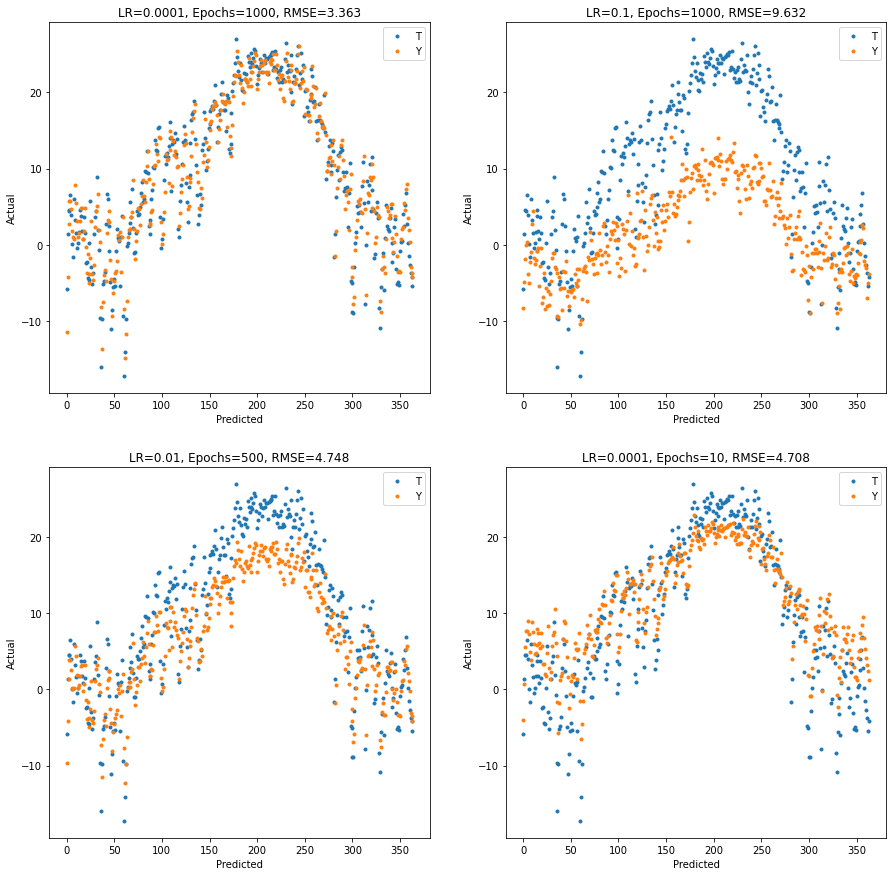

In [305]:
# Here, we see some of the effects of a high learning rate versus a low learning rate, as well as a larger or smaller
# number of epochs. While this changes for different datasets (particularly for more complex forms of machine learning),
# this demonstrates clearly that using a very high number of epochs and a sufficiently low learning rate can be helpful
# in producing the best RMSE. On the other hand, a learning rate that is too high will almost invariably yield an inferior model.
# On the other hand, even a low number of epochs (10) can still be reasonably sufficient for some datasets, particularly when using
# linear regression. Even so, the most effective model here (at least as far as minimizing rmse is concerned) is the
# long, slowly-trained model that we see first.
#
# We see some difference here in the RMSE shown in the label (using rmse()) and the RMSE shown during the training.
# This is because the training RMSE value is standardized, while that in the labels is not, and is therefore indicative
# of the actual error of the predicted temperature. Thus, the best model is off by an average of 3.363 degrees, while the
# worst is off by an average of 9.632 degrees.
#
# It should be noted that this says little about the effectiveness of the model for untrained data. A separate test
# set that the model has not been tested on should be used to verify the results.


learning_rates = [0.0001, 0.1, 0.01, 0.0001]
epochs = [1000, 1000, 500, 10]
models = [None, None, None, None]

plt.figure(figsize=(15, 15))

for i in range(len(learning_rates)):

    models[i] = train(X, T, learning_rate=learning_rates[i], n_epochs=epochs[i], verbose=True)

    Y = use(X, models[i])


    rmse_val = rmse(Y, T)

    plt.subplot(2, 2, i+1).set_title("LR={}, Epochs={}, RMSE={:.3f}".format(learning_rates[i], epochs[i], rmse_val))
    plt.plot(T, '.', label='T')
    plt.plot(Y, '.', label='Y')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.legend()

    

## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [323]:
# The weights have an additional column to account for the overall bias of the model,
# so Xnames needs that name for our print statement.

Xnames= np.array(['bias', 'tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust'])

weightArray = np.array([
    np.array(Xnames),
    np.array(models[0]['w']).T[0],
    np.array(models[1]['w']).T[0],
    np.array(models[2]['w']).T[0],
    np.array(models[3]['w']).T[0]
])

weightFrame = pandas.DataFrame(weightArray[1:, :], columns=weightArray[0, :])
weightFrame = weightFrame.astype('float')
weightFrame.round(4)

# Here, we have the weights for each of the four models we developed, each of which is more by different inputs.
# First, it should be noted that each model has a negative bias, though the second model has the most pronounced negative
# biased.
#
# For the first (most accurate) model, tave, tmax, and tmin have the most significant positive effects on the data,
# whereas gust has the strongest negative impact. These are all fairly predictable. vp, thmax, rhmin, and pp, however,
# are practically negligible.
#
# For the second (least accurate) model, we see the outcome is affected very powerfully by vp, rhmax, and rhmin, with
# the first two having a positive correlation and the latter two having a negative correlation. This overall disagreement
# with the first set of weights may help to explain mathematically why this second model has yielded such poor results.
# It helps
#
# For the third model, we see much the same distribution of weights as the first model, except that vp has a much more
# pronounced effect in this model, and tmax is less important. Additionally, rhmin has a negative, rather than positive, effect.
#
# For the final model, we again see the same overall distribution as the first model, except that gust has decidedly less
# effect.
#
# Overall, this helps to display not only the effect of different inputs on potential weather outcomes, but also demonstrates
# that different models can disagree in their output somewhat. This leaves much judgment up to the machine learning engineer
# to determine whether the model has been trained properly.


,bias,tave,tmax,tmin,vp,rhmax,rhmin,pp,gust
0,-0.1378,0.2715,0.2456,0.2973,0.1179,0.0717,0.0761,0.0654,-0.3145
1,-2.7377,0.0955,-0.0104,0.1956,4.2621,-4.3400,-4.2511,0.4289,-0.5582
2,-0.3251,0.2143,0.1730,0.2529,0.3335,0.0604,-0.1867,0.0938,-0.2984
3,-0.0512,0.1910,0.1673,0.2148,0.0352,0.0246,0.0265,0.0200,-0.0159


## Grading and Check-in

Your notebook will be partially graded automatically.  You can test this grading process yourself by downloading [A1grader.zip](https://www.cs.colostate.edu/~cs445/notebooks/A1grader.zip) and extract `A1grader.py` parallel to this notebook.  Run the code in the in the following cell to see an example grading run.  If your functions are defined correctly, you should see a score of 60/60.  The remaining 40 points are based on testing other data and your discussion.

In [307]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Richard-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
  X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
  T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
  model = train(X, T, 0.001, 1000, True)

Epoch 100 RMSE 0.46
Epoch 200 RMSE 0.24
Epoch 300 RMSE 0.15
Epoch 400 RMSE 0.13
Epoch 500 RMSE 0.13
Epoch 600 RMSE 0.12
Epoch 700 RMSE 0.12
Epoch 800 RMSE 0.12
Epoch 900 RMSE 0.12
Epoch 1000 RMSE 0.12

--- 20/20 points. Returned correct values.

--- 10/10 points. Xmeans and Xstds are correct values.

--- 10/10 points. Tmeans and Tstds are correct values.

Testing
  Y = use(X, model)


--- 10/10 points. Returned correct values.

Testing
  err = rmse(Y, T)


--- 10/10 points. Returned correct values.

C:\Users\masks\Documents\git\cs445 Execution Grade is 60 / 60

 __ / 5 Reading in weather.data correctl

A different but similar grading script will be used to grade yout checked-in notebook.  It will include different tests.

You must name your notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

In [ ]:
T = data[1:, 0:1] -  data[:-1, 0:1]

Now repeat the training experiments to pick good `learning_rate` and
`n_epochs`.  Use predicted values to produce next day tave values by
adding the predicted values to the previous day's tave.  Use `rmse`
to determine if this way of predicting next tave is better than
directly predicting tave.